En esta etapa #2 del proyecto se dejará en evidencia todos los procesos que se realizaron en la etapa #1 y así mismo se dará un ejemplo ilustrativo por cada proceso con el fin de lograr una mejor comprensión para el lector.

Para esta etapa primero se instala las librerías pydub y FFmpeg de la siguiente manera:

In [ ]:
! pip install pydub
! pip install FFmpeg

También se tuvo que instalar una librería Python con el siguiente código:

In [ ]:
import IPython

Explicación de los códigos.

En el siguiente Código logramos visualizar las muestras de sonidos en función del tiempo ya que con esta información se nos permite evaluar mejor los datos obtenidos:

In [ ]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

# Load data from wav file
sample_rate,  middle_c = wavfile.read('/content/muestra1.wav')

# Plot sound wave
plt.plot(middle_c[500:22500])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Funcion en tiempo Muestra 1')
plt.grid()

Un ejemplo del uso de este codigo es el siguiente.

Sonido de muestreo #1 sin cortar:

Grafica en función del tiempo:

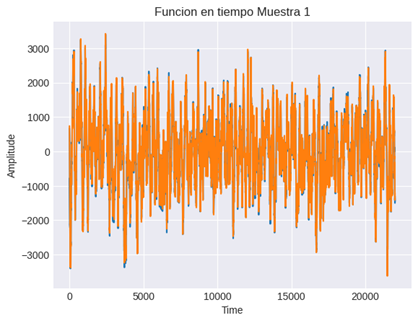

Tambien se tiene el siguiente código se utiliza para elaborar la gráfica de los espectros de cualquier sonido, en este caso fue utilizado crear los espectros de las muestras de sonido que obtuvimos gracias a los sonidos brindados.

In [ ]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

# Load data from wav file
sample_rate, middle_c = wavfile.read('muestra1.wav')

#FFT
t = np.arange(middle_c.shape[0])
freq = np.fft.fftfreq(t.shape[-1])*sample_rate
sp = np.fft.fft(middle_c)

# Plot spectrum
plt.plot(freq, abs(sp.real))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Espectro de sonido muestra 1')
plt.xlim((0, 22500))
plt.ylim((-300, 30000))
plt.grid()

Un ejemplo del uso de este codigo es el siguiente.

Sonido de muestreo #1 sin cortar:

Grafica del espectro:

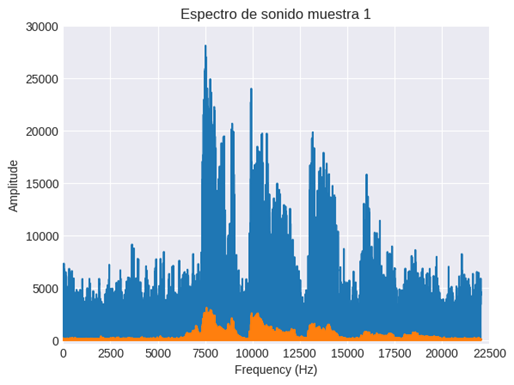

De estas graficas concluimos que cada espectro de un sonido cortado y sin cortar es diferente, pero la función del tiempo es muy similar al sonido cortado que al de sin cortar. También cabe recalcar que las gráficas obtenidas nos permiten visualizar que hay más de un sonido interactuando en la función con respecto al tiempo y también con respecto a la frecuencia, así evidenciamos que las frecuencias de los sonidos son muy fuertes y logran establecerse juntas en las gráficas. De esta manera los elementos de ruido se ven distorsionados en las gráficas ya que alteran el sonido que se brinda y es por eso por lo que las gráficas se ve que hay más de una sola frecuencia.

En el siguiente código se logra graficar la frecuencia de las muestras de sonido tanto en “lowpass” como en “highpass”, así nos permite obtener el sonido de la muestra delimitado la frecuencia del ruido que contamina el sonido de las personas hablando, esto se limita con la frecuencia de corte y la frecuencia de Nyquist.

In [ ]:
import librosa
import soundfile as sf
from scipy import signal
import matplotlib.pyplot as plt

#Cargar el archivo de audio
audio_wav = 'muestra1.wav'
audio, sr = librosa.load(audio_wav, sr=None)

#Diseñar el filtro de paso bajo
cutoff_freq = 300  # Frecuencia de corte en Hz
nyquist_freq = 0.2 * sr
cutoff_normalized = cutoff_freq / nyquist_freq
b, a = signal.butter(4, cutoff_normalized, btype='highpass')

audio_filtrado = signal.lfilter(b, a, audio)

ruta_filtrada = 'muestra1-filtro-high.wav'
sf.write(ruta_filtrada, audio_filtrado, sr)

fig, ax = plt.subplots(figsize=(20,4))
ax.plot(audio_filtrado)

Un ejemplo del uso de este codigo es el siguiente.

-En la muestra 1 se obtiene los siguientes gráficos:

Muestra1 de filtro low:

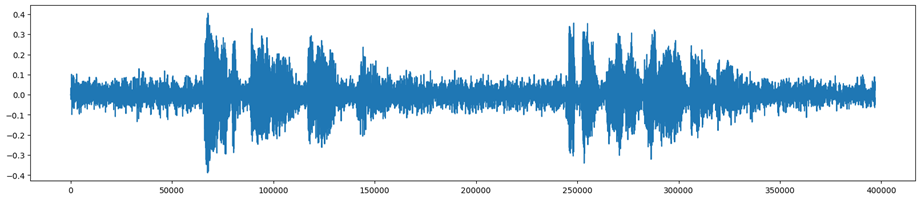

Muestra1 de filtro high:

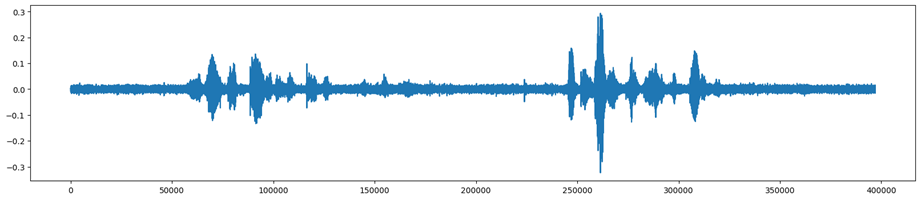

Gracias a estos ejemplos de grafica se pudo evidenciar el sonido sin contaminación de ruido, es decir, la muestra filtrada, también mediante el siguiente código evaluamos como se escucha el sonido y se hace un testeo del audio filtrado con la frecuencia de corte y de Nyquist ideal mediante el sonido que nos brinda la siguiente línea de código:

In [ ]:
IPython.display.Audio("muestra1-filtro-high.wav")

Para culminar el ejemplo previo tenemos lo siguiente.

Después de evaluar el sonido se evidencia que en este ejemplo su filtro ideal es de “highpass” ya que la voz tiene un sonido mayor que el ruido contaminante y el “highpass” nos permite pasar el sonido alto y disminuir el bajo, es por eso que la frecuencia de corte ideal en el sonido de la muestra 1 es de 300Hz y la frecuencia de Nyquist ideal es de 0.2Hz, brindándonos así una muestra filtrada en la cual se percibe de mejor manera la voz humana antes que el ruido contaminante.

Cabe recalcar que esta informacion es obtenida del audio brindado por el codigo y asi mismo al escucharlo y analizarlo.

Parte de investigacion.

Introduccion.

En este proyecto se mencionarán las características del ruido y como estas intervienen en los dispositivos de sonido mediante las brindadas para las personas con discapacidad.

El ruido de la señal es un problema que ocurre en muchos campos y situaciones diferentes, afectando la calidad de los datos y la información transmitida. Este fenómeno hace referencia a la presencia de señales no deseadas o ruido en la señal original, que pueden interferir en la correcta interpretación o procesamiento de esa señal.

En el caso de los dispositivos de asistencia para discapacitados, el ruido puede tener graves consecuencias. Estos dispositivos están diseñados para mejorar la calidad de vida de las personas con discapacidad, ya sea a través de ayudas auditivas, visuales o de movilidad. Sin embargo, si se interfiere con la señal recibida por estos dispositivos, el dispositivo puede funcionar mal y poner en peligro la seguridad y la salud del usuario.

El ruido en la señal de audio es una preocupación importante, ya que puede afectar negativamente la calidad del sonido y la inteligibilidad del habla. El ruido puede provenir de una variedad de fuentes, como el entorno, la interferencia electromagnética o el propio dispositivo de reproducción de audio. Para las personas con pérdida auditiva, el ruido puede interferir con su capacidad para comprender el habla y participar plenamente en las actividades diarias.

Desarrollo.

Se describe que el ruido es una señal no deseada que se mezcla con la señal de audio original y a la vez distorsiona su calidad. Este problema del ruido en las señales de audio ha generado varias investigaciones en el campo de la ingeniería eléctrica y electrónica.

Segun Simon Paonessa (parrafo 2) el ruido de las señales: "en su sentido más básico, es cualquier interferencia no deseada que degrada una señal de comunicación. El ruido de la señal puede interferir con las señales analógicas y digitales; sin embargo, la cantidad de ruido necesaria para afectar una señal digital es mucho mayor.". Esto nos permite conocer mejor el gran problema del ruido y el por que ha generado tanta controversia a lo largo de los años en la industria auditiva e ingenieril.

En el caso de la asistencia técnica para discapacidades, el ruido puede ser especialmente peligroso porque dificulta el poder escuchar y asi mismo comprender el mensaje que se transmite. Esto puede tener graves consecuencias si el mensaje es importante para la seguridad o la salud del usuario. Para solucionar este problema, muchos investigadores han propuesto diferentes técnicas para reducir el ruido en la señal de audio, una de estas técnicas utilizadas es el filtrado digital, que consiste en procesar la señal de audio a través de un filtro que elimina las frecuencias no deseadas, como se vio en clase del "High pass" y "Low pass". Otra técnica es utilizar algoritmos avanzados como el algoritmo MMSE (Mean Mean Square Error) que utiliza modelos en especial estadísticos para estimar la señal original y eliminar el ruido. Además, algunas investigaciones se han centrado específicamente en el diseño de audífonos con características especiales de reducción de ruido. Por ejemplo, algunos dispositivos incluyen micrófonos direccionales que permiten captar mejor la voz del orador y reducir el ruido de fondo.

Tambien se mencionaran algunas causas del ruido en las señales, las cuales son las siguientes segun Simon Paonessa:

-Practicas de cableado deficiente: Las redes mal cableadas, como las que no utilizan conductos ni par trenzado blindado, son más susceptibles al ruido eléctrico ambiental. -Circuitos del producto mal diseñados:Los circuitos electrónicos mal diseñados dentro de los dispositivos, que no brindan una protección adecuada contra las fuentes de ruido internas y externas, también tendrán más probabilidades de tener problemas de señal. -Cercanias a otros equipos electricos:Los dispositivos o cables colocados muy cerca de equipos eléctricos que generan fuertes campos magnéticos, como generadores, motores o líneas eléctricas, pueden captar parte de esa interferencia, lo que puede contribuir a las fluctuaciones en las señales de comunicación.

Mejoras para este problema.

Al igual que con todos los problemas de conectividad de control de procesos industriales, es mucho más fácil seguir algunas de las mejores prácticas simples al planificar, diseñar e instalar dispositivos de control de procesos que tratar de solucionar los problemas del sistema después de que se active. Una planificación exitosa puede ahorrar cientos de horas de trabajo y una frustración incalculable cuando se trata de evitar que el ruido de la señal interfiera con el sistema.

Segun Simon Paonessa, "Cuando se trata de prevenir la interferencia de la señal, cuanto más pequeña es la señal, más susceptible es a la interferencia. Las señales de bajo nivel, como la señal de pulso de un caudalímetro de sensor magnético o la salida de milivoltios de un termopar, son muy sensibles al ruido ambiental. Cualquier cantidad de ruido que se introduzca en este tipo de sistemas tendrá un efecto en la señal transmitida." Lo que nos quiere decir que no se puede cancelar del todo el ruido de una señal, al igual que se vio en clase, no se busca cancelar el ruido de una señal debido a que es un problema que ha trascendido a lo largo de los años, pero si se busca disminuir el ruido y asi mismo ayudar a las personas con discapacidad auditiva a tener una mejor capacidad auditiva.

Conclusion.

En conclusión, la interferencia de ruido en señales sigue siendo un problema importante en la industria que ha afectado a muchos tipos de equipos electrónicos y en especial a sistemas de comunicación. Como se mencionó anteriormente este problema afecta a los dispositivos de asistencia para personas con discapacidad ya que se enfrentan a grandes desafíos debidos al ruido de las señales de sonido. El ruido puede afectar negativamente la calidad de vida de las personas que dependen de estos dispositivos, lo que puede resultar alarmante.

Si bien se sabe aún queda mucho trabajo por hacer para solucionar los problemas de interferencia de ruido en las señales, de igual forma se han creado varias formas de mejorar estos problemas. Por ejemplo, algunos fabricantes utilizan técnicas avanzadas de reducción de ruido que pueden eliminar eficazmente el ruido no deseado de la señal. Además, los diseñadores pueden agregar filtros de sonido y otras características al dispositivo para ayudar a reducir el impacto del ruido.
Otra forma importante de lidiar con esto es profundizar e investigar cómo se produce el ruido de la señal y qué se puede hacer para prevenirlo o minimizarlo. Al comprender mejor cómo funciona el ruido, podemos desarrollar estrategias más efectivas para combatirlo.

Es por eso que se busca concientizar la importancia de la ayuda de la tecnología para disminuir este problema, de esta forma nos damos cuenta que no se podrá eliminar el ruido del todo pero sí disminuir y tratar que sea a un punto mínimo que no genere problema a las personas que tienen discapacidad auditiva, esto con el fin de que puedan tener una continuidad de la vida cotidiana normal.

Referencias.

Se adjuntan las referencias que nos permitieron un mejor dominio del tema de ambas etapas del proyecto.

Enginner Ambitously. (s.f.). NI. Recuperado el 27 de Mayo de 2023, de https://www.ni.com/es-cr/shop/data-acquisition/measurement-fundamentals-main-page/analog-fundamentals/acquiring-an-analog-signal--bandwidth--nyquist-sampling-theorem-.html#:~:text=El%20Teorema%20de%20Muestreo%20de%20Nyquist%20explica%20la%20relaci%C3%B3n%

Support, A. (s.f.). Apple. Recuperado el 28 de Mayo de 2023, de https://support.apple.com/es-lamr/guide/mainstage/lgsife419913/mac#:~:text=La%20frecuencia%20de%20corte%20(o,por%20encima%20de%202500%20Hz

Paonessa, S. (s.f.). Presicion digital. Recuperado el 24 de Junio de 2023, de https://www.predig.com/whitepaper/reducing-signal-noise-practice

Attune Hearing Pty Ltd. (s.f.). Recuperado el 24 de Junio de 2023, de https://www.attune.com.au/2021/09/27/hearing-aids-and-background-noise-how-do-i-cope/